In [2]:
from facenet_pytorch import MTCNN, InceptionResnetV1
import torch
from PIL import Image, ImageDraw
import os

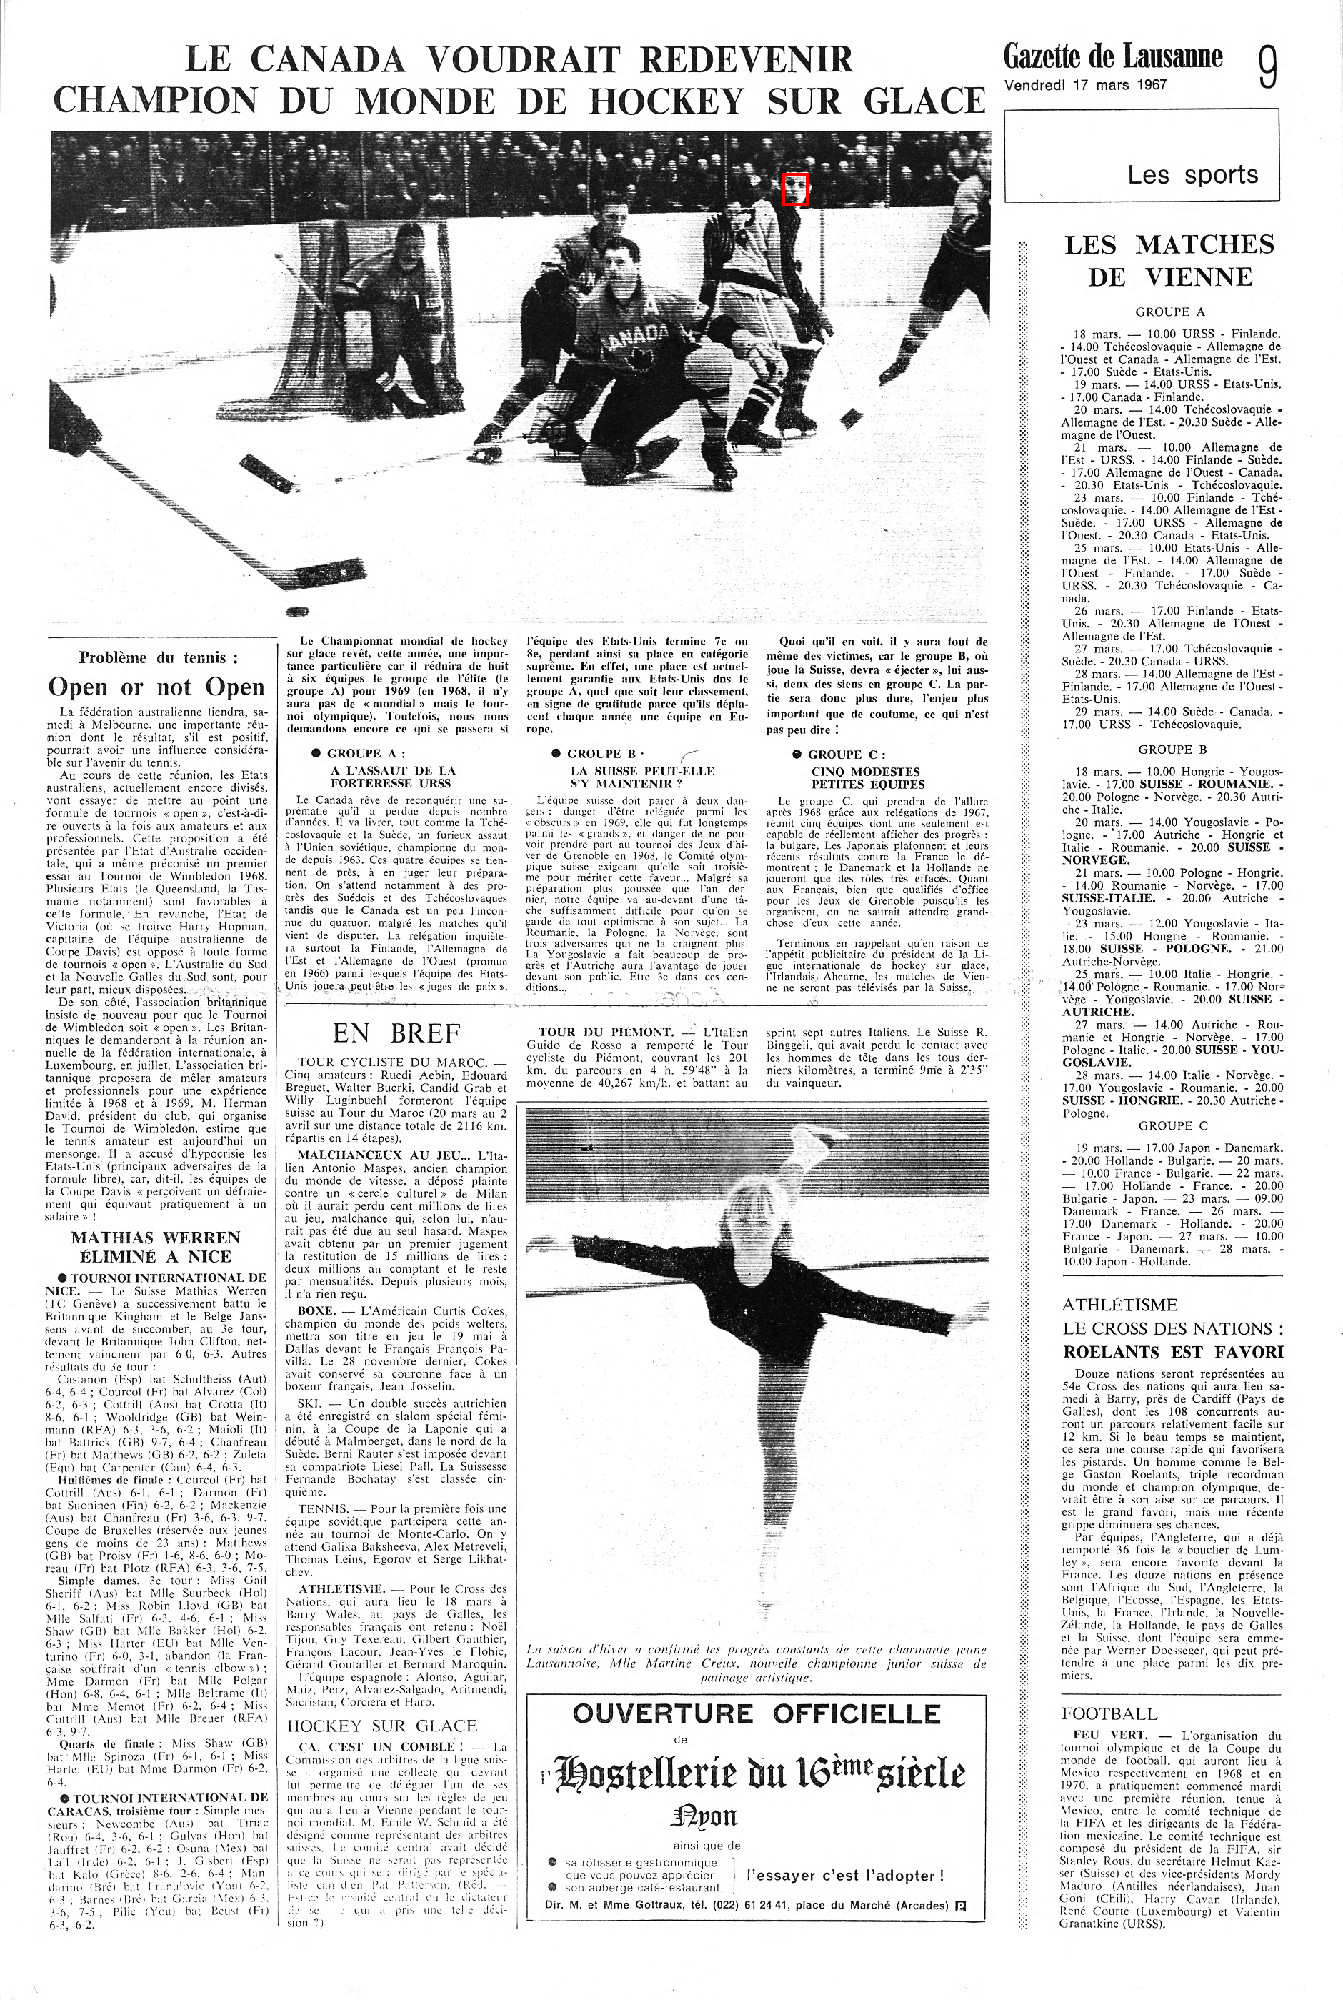

In [4]:

# Initialize MTCNN for face detection
mtcnn = MTCNN(keep_all=True)

# Load pre-trained FaceNet model
resnet = InceptionResnetV1(pretrained='casia-webface').eval()

# Load an image containing faces
filepath = os.path.join("..","in","GDL","GDL-1967-03-17-a-p0009.jpg")
img = Image.open(filepath)

# Detect faces in the image
boxes, _ = mtcnn.detect(img)

# Check if faces were detected
if boxes is not None:
    for box in boxes:
            draw = ImageDraw.Draw(img)
            draw.rectangle(box.tolist(), outline='red', width=3)
else:
    boxes_shape = 0

img.show()
img.save(os.path.join("..","out","model_test.png"))

In [ ]:
def process(data_path):
    dirs = sorted(os.listdir(data_path))
    results = []
    output_path = os.path.join("out")

    for directory in dirs:
        subfolder = os.path.join(data_path, directory)
        image_files = sorted(os.listdir(subfolder))

        for index, image in enumerate(image_files):
            image_path = os.path.join(subfolder, image)
            try: 
                data = face_detection(image_path)
                results.append({
                    'Image': image, 
                    'Newspaper': directory, 
                    'Year': image.split("-")[1],
                    'Faces': data
                }) 
            except Exception as e:
                print(f"Error with {image}: {e}")
            print(str(index) + " of " + str(len(image_files)))
    
    df = pd.DataFrame(results)
    df.to_csv(os.path.join(output_path, "faces.csv"), index=False)

    return df

In [ ]:
def save_csv(df, output_path):
    output_path = os.path.join("out")
    df['Decade'] = (df['Year'].astype(int) // 10) * 10 
    df['Has_faces'] = df['Faces'].apply(lambda x: 1 if x != 0 else 0)

    grouped_df = df.groupby(['Newspaper', 'Decade']).agg(
        Pages_with_faces_sum=('Has_faces', 'sum'),
        Total_pages=('Faces', 'count') 
    ).reset_index()

    grouped_df['Percentage_pages_with_faces'] = round((grouped_df['Pages_with_faces_sum'] / grouped_df['Total_pages']) * 100, 2)
    grouped_df = grouped_df.sort_values(by=['Decade', 'Newspaper'])

    grouped_df.to_csv(os.path.join(output_path, "grouped_faces.csv"), index=False)
    return grouped_df